In [1]:
import numpy as np
import os
import shutil
import zipfile
import gdown
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras as kr
from os import path
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator

In [2]:
url = 'https://drive.google.com/uc?id=1v_AAdLtDgGOvXNA2UYEIfq-H7ZJX6FvQ'
dataset_dir = "snail-isopod/"
zip_dir = path.join(dataset_dir, "snail-isopod.zip")

gdown.download(url, dataset_dir)
zip = zipfile.ZipFile(zip_dir, "r")
zip.extractall(dataset_dir)
zip.close()
os.remove(zip_dir)
os.listdir(dataset_dir)

Downloading...
From: https://drive.google.com/uc?id=1v_AAdLtDgGOvXNA2UYEIfq-H7ZJX6FvQ
To: /content/snail-isopod/snail-isopod.zip
100%|██████████| 27.0M/27.0M [00:00<00:00, 74.0MB/s]


['train']

In [3]:
imdatagen = ImageDataGenerator(
rescale            =1./255,
rotation_range     = 180,
width_shift_range  = 0.2,
height_shift_range = 0.2,
shear_range        = 0.5,
zoom_range         = 0.2,
horizontal_flip    = True,
vertical_flip      = True)

train_generator = imdatagen.flow_from_directory(
  path.join(dataset_dir, "train"),
  batch_size=8,
  color_mode = "grayscale",
  target_size = (128,128),
  class_mode = "binary"
)

Found 344 images belonging to 2 classes.


In [4]:
convnet = models.Sequential()
convnet.add(layers.Input((128,128,1)))
convnet.add(layers.Conv2D(28, (3,3), activation='relu'))
convnet.add(layers.MaxPool2D())
convnet.add(layers.Conv2D(32, (3,3), activation='relu'))
convnet.add(layers.MaxPool2D())
convnet.add(layers.Conv2D(32, (3,3), activation='relu'))
convnet.add(layers.MaxPool2D())
convnet.add(layers.Conv2D(64, (3,3), activation='relu'))
convnet.add(layers.MaxPool2D())

convnet.add(layers.Flatten())
convnet.add(layers.Dropout(0.5))
convnet.add(layers.Dense(512,'relu'))
convnet.add(layers.Dense(1, 'sigmoid'))

convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 28)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        8096      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [5]:
convnet.compile(loss = "binary_crossentropy",
                optimizer = optimizers.rmsprop_v2.RMSProp(lr=1e-4),
                metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = convnet.fit_generator(train_generator, steps_per_epoch=43, epochs=400)

43/43 [==============================] - 7s 164ms/step - loss: 0.6764 - acc: 0.5523
Epoch 30/400
43/43 [==============================] - 7s 165ms/step - loss: 0.6888 - acc: 0.5465
Epoch 31/400
43/43 [==============================] - 7s 165ms/step - loss: 0.6793 - acc: 0.5930
Epoch 32/400
43/43 [==============================] - 7s 164ms/step - loss: 0.6826 - acc: 0.5640
Epoch 33/400


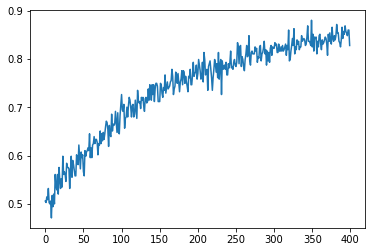

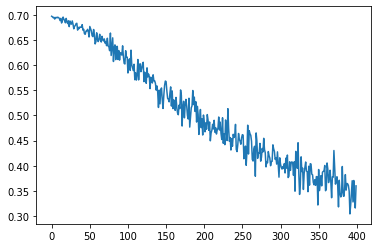

In [ ]:
plt.figure()
plt.plot(history.history['acc'])

plt.figure()
plt.plot(history.history['loss'])

plt.show()